# Import Libraries

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Load the Dataset and Explore the Dataset

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

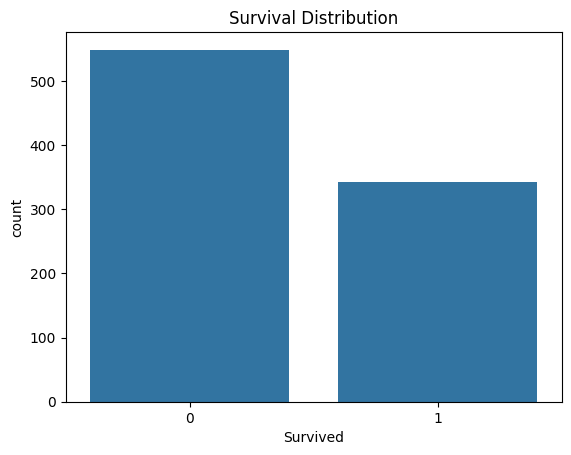

In [39]:
# Load the dataset
url = '/content/Titanic-Dataset.csv'  # Replace with the actual URL or file path
data = pd.read_csv(url)
# Display the first few rows of the dataset
print(data.head())

# Get basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Visualize the survival distribution
sns.countplot(x='Survived', data=data)
plt.title('Survival Distribution')
plt.show()


# Data Preprocessing

In [40]:
# Fill missing values (for simplicity, let's fill Age with the median)
data['Age'].fillna(data['Age'].median(), inplace=True)

# Drop columns that are not useful for prediction
data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# Convert categorical variables to numerical (e.g., Sex and Embarked)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Check the processed data
print(data.head())


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500       2.0
1         1       1    1  38.0      1      0  71.2833       0.0
2         1       3    1  26.0      0      0   7.9250       2.0
3         1       1    1  35.0      1      0  53.1000       2.0
4         0       3    0  35.0      0      0   8.0500       2.0


<ipython-input-40-178274d1bfbe>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


# Split the Data

In [41]:
# Define features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the Model


In [42]:
# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Make Predictions

In [43]:
# Make predictions
y_pred = model.predict(X_test)


# Evaluate the Model

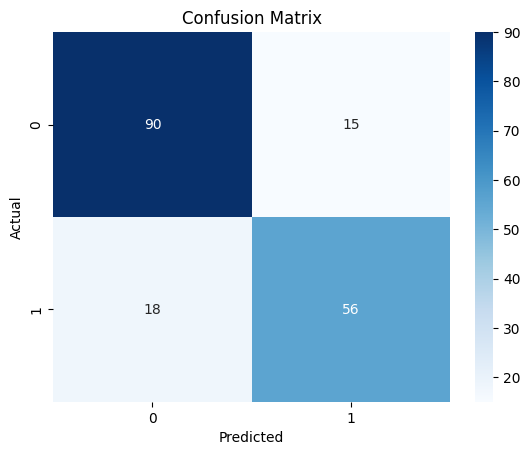

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



In [44]:
# Display confusion matrix
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))


# Visualize Feature Importance

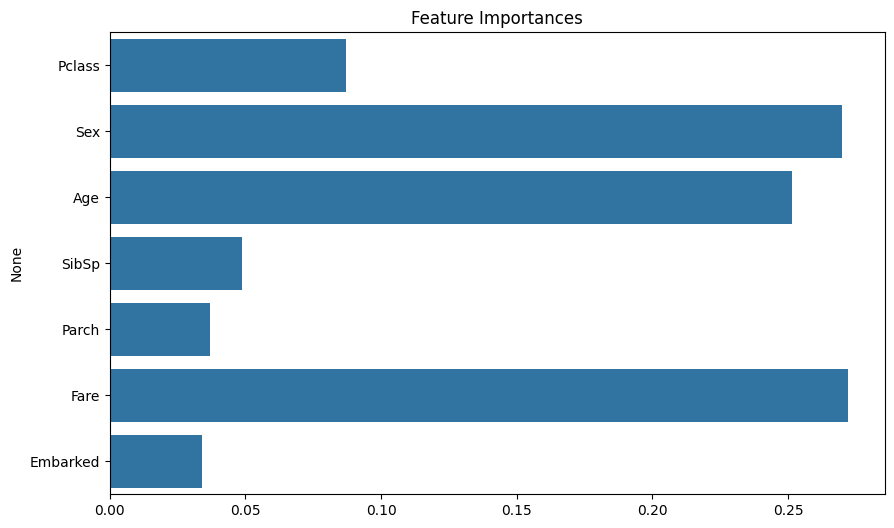

In [45]:
# Plot feature importances
feature_importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances')
plt.show()
